# Customer Churn Prediction in Banking: Understanding and Addressing Key Factors using Neural Network

## Background

In the banking industry, keeping customers satisfied is crucial. Understanding why customers leave, known as churn, helps banks retain a strong customer base. Several factors contribute to churn, and identifying them allows banks to implement strategies for customer retention.

## Common Reasons for Customer Churn

### 1. Price Sensitivity
- **Issue:** Customers might leave if they feel banking services are too expensive.
- **Impact:** Charging high prices without providing enough value can lead to dissatisfaction and customer departure.

### 2. Product Performance
- **Issue:** Customers choose a bank based on promised benefits; unmet expectations may prompt them to leave.
- **Impact:** Dissatisfaction due to unmet expectations can result in customers seeking alternative banking solutions.

### 3. Competition Influence
- **Issue:** Rival banks offering better services or incentives can attract customers away.
- **Impact:** Competing banks might lure customers, challenging retention efforts.

### 4. Internal Business Conditions
- **Issue:** Changes within the bank, like policy adjustments or service disruptions, can impact customer relationships.
- **Impact:** Unfavorable internal conditions may make it difficult for customers to continue their association with the bank.

## Dataset Overview

The bank customer churn dataset is a valuable resource for predicting and understanding churn. It is available on **Kaggle** website with License
CC0: Public Domain. It includes the following attributes:

| Attribute           | Description                                                   |
|---------------------|---------------------------------------------------------------|
| Customer ID         | A unique identifier for each customer.                        |
| Surname             | The customer's last name.                                     |
| Credit Score        | Numerical representation of the customer's creditworthiness.   |
| Geography           | The country where the customer resides (France, Spain, Germany).|
| Gender              | The customer's gender (Male or Female).                       |
| Age                 | The customer's age.                                           |
| Tenure              | Number of years the customer has been with the bank.           |
| Balance             | Customer's account balance.                                   |
| NumOfProducts       | Number of bank products the customer uses (e.g., savings account, credit card).|
| HasCrCard           | Whether the customer has a credit card (1 = yes, 0 = no).      |
| IsActiveMember      | Customer's active membership status (1 = yes, 0 = no).        |
| EstimatedSalary     | Estimated salary of the customer.                              |
| Exited              | Indicates whether the customer has churned (1 = yes, 0 = no).  |

## Objective

The objective is to use this dataset to build a predictive model identifying patterns and factors contributing to customer churn. By doing so, the bank aims to proactively address potential issues, improve customer satisfaction, and implement strategies to reduce churn.

Understanding particular reasons behind customer churn empowers the bank to make informed decisions, foster long-term customer relationships, and maintain a competitive edge in the dynamic banking industry.


## 1. Importing Libraries & Loading Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow
from tensorflow.keras import models, layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.simplefilter('ignore')  # Ignore all warnings

In [2]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


## 2. Data Munging

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [5]:
# 1. Drop Unnecessary Columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

### 2.1 Missing Value Treatment

In [6]:
df.isnull().sum()

CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

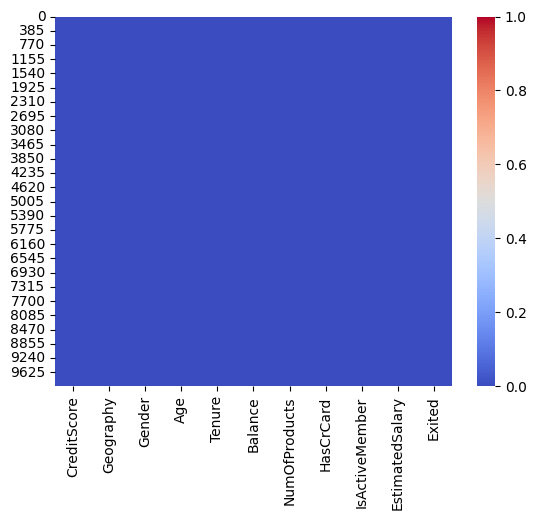

In [7]:
# Create the heatmap
sns.heatmap(df.isnull(), cmap='coolwarm')
plt.show()

In [8]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df['Geography'] = imputer.fit_transform(df[['Geography']])
imputer = SimpleImputer(strategy='mean')
df[['Age', 'HasCrCard', 'IsActiveMember']] = imputer.fit_transform(df[['Age', 'HasCrCard', 'IsActiveMember']])

In [9]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 3. Exploratory Data Analysis

### 3.1 Univariate Analysis - Numerical Attributes

In [10]:
numerical_variables = ['CreditScore','Age', 'Balance','EstimatedSalary' ]
target_variable = 'Exited'
categorical_variables = ['Geography', 'Gender', 'Tenure','NumOfProducts', 'HasCrCard','IsActiveMember']

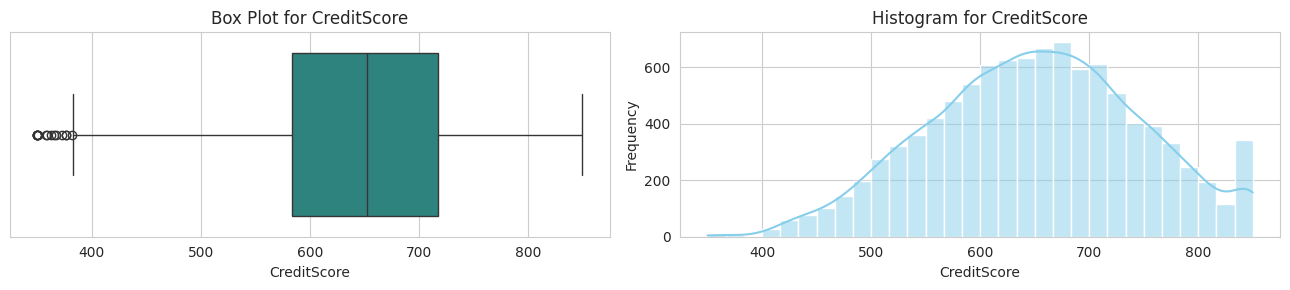

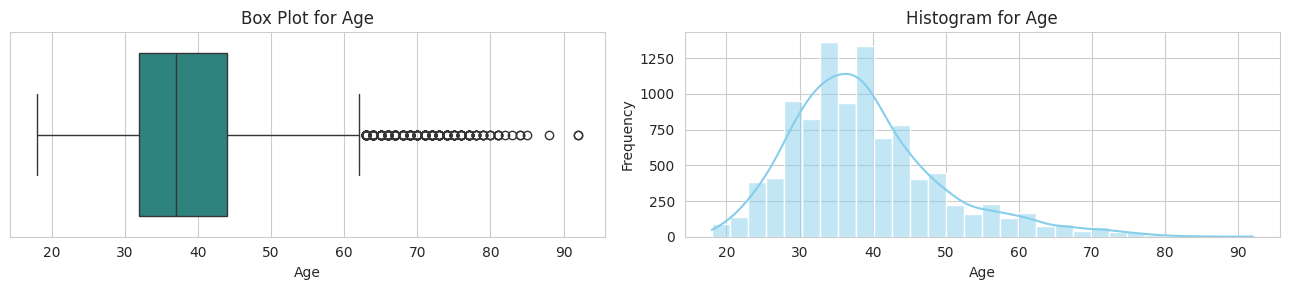

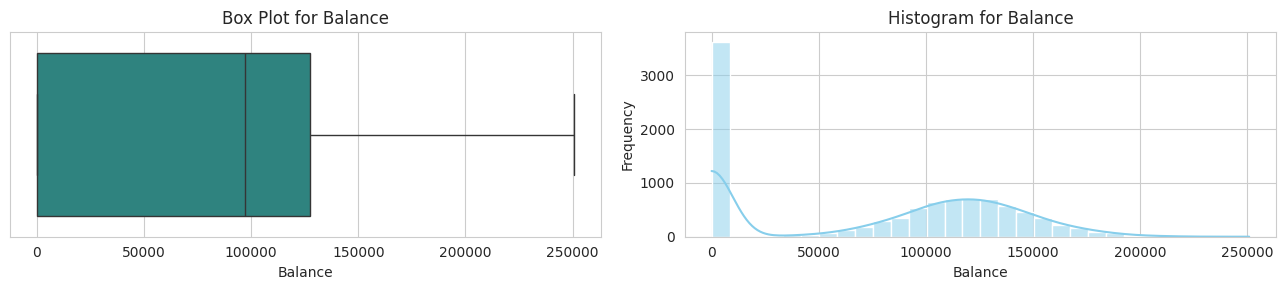

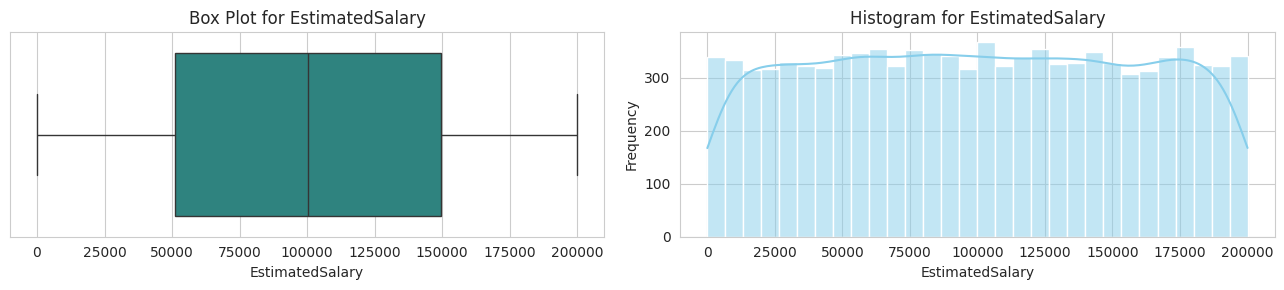

In [11]:
# Function to create and display a row of plots for a single variable
def create_variable_plots(variable):
    sns.set_style('whitegrid')

    fig, axes = plt.subplots(1, 2, figsize=(13, 3))

    # Box plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=variable, palette='viridis')
    plt.xlabel(variable)
    plt.title(f"Box Plot for {variable}")

    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=variable, kde=True, bins=30, color='skyblue')
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(f"Histogram for {variable}")

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

# Perform univariate analysis for each numerical variable
for variable in numerical_variables:
    create_variable_plots(variable)

# Analysis of Age and Credit Score Distributions

## Age Distribution

- **Skewness:**
  - The distribution of age is right-skewed, indicating a higher concentration of people in younger age groups compared to older age groups.

- **Central Tendency:**
  - The median age is lower than the mean age, further confirming the right-skewed nature of the distribution.

- **Spread:**
  - The interquartile range (IQR) for age is 30 years, representing the range within which the middle 50% of the population falls.

- **Outliers:**
  - There are outliers in the dataset, indicating individuals who are much older than the rest of the population.

## Credit Score Distribution

- **Skewness:**
  - The distribution of credit scores is right-skewed, suggesting a larger proportion of people with lower credit scores compared to higher credit scores.

- **Central Tendency:**
  - Similar to age, the median credit score is lower than the mean credit score, supporting the right-skewed distribution.

- **Spread:**
  - The interquartile range (IQR) for credit scores is 200, representing the range within which the middle 50% of the population's credit scores lie.

- **Outliers:**
  - Outliers exist in the dataset, indicating individuals with significantly higher credit scores than the rest of the population.

These insights are derived from the analysis of box plots and histograms for the variables "Age" and "Credit Score," providing a comprehensive understanding of their distributions and characteristics.


### 3.2 Univariate Analysis - Categorical Attributes

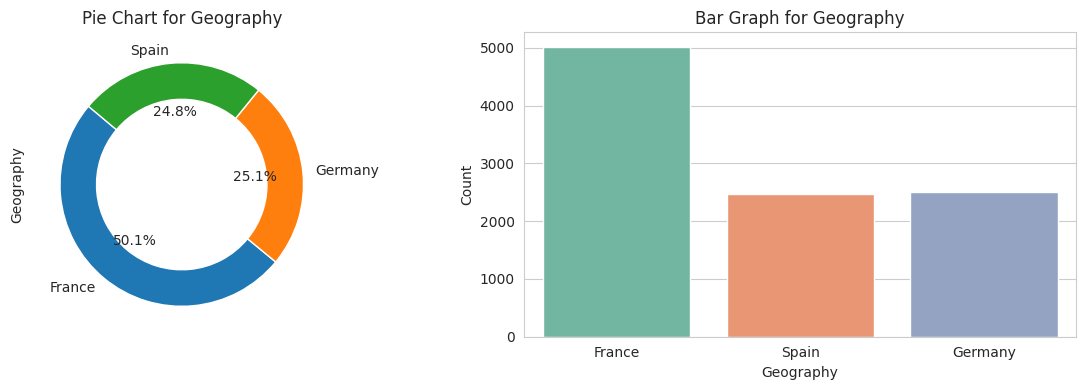

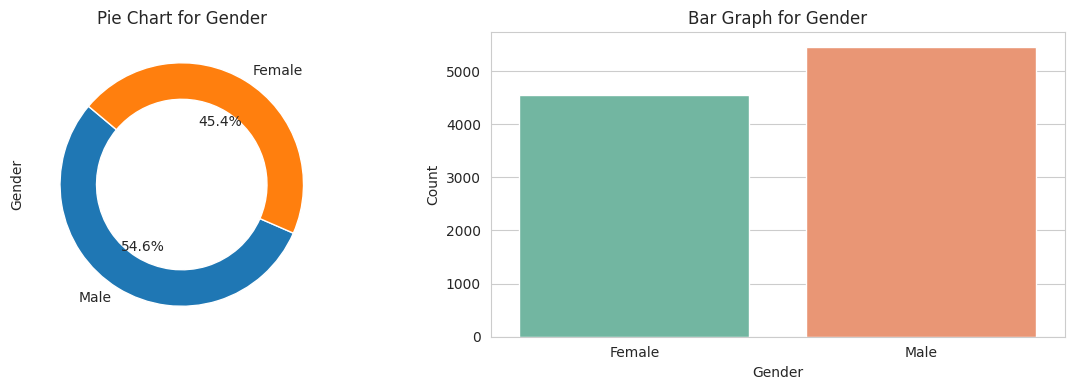

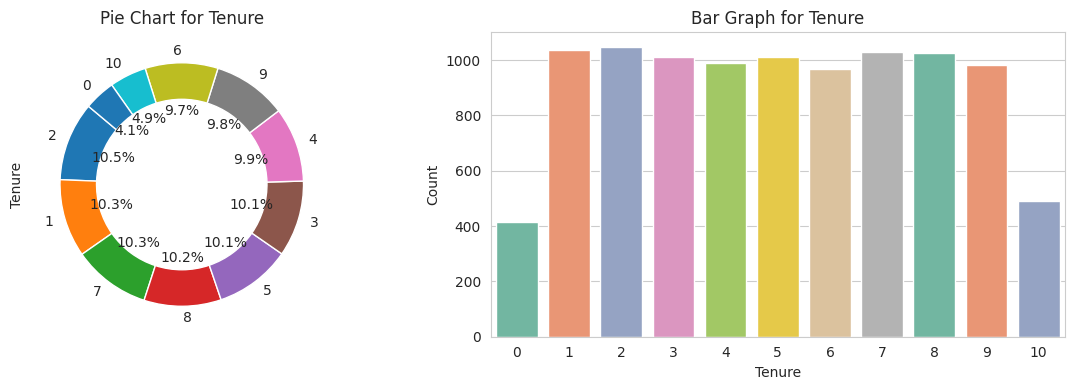

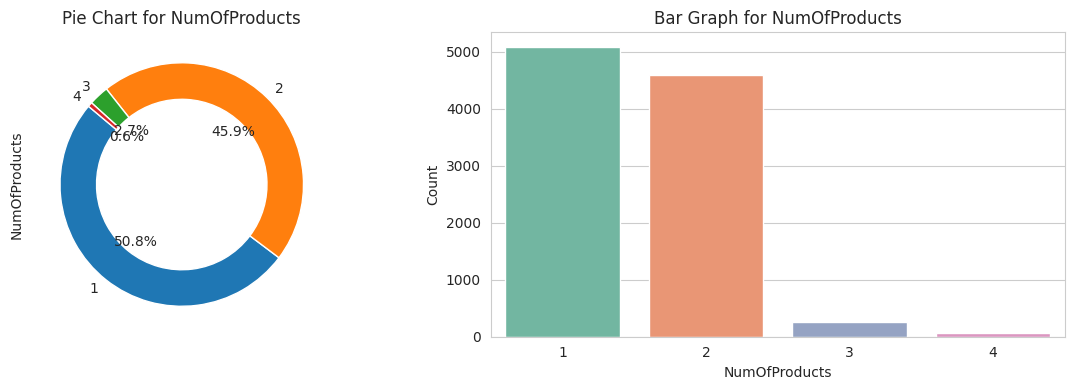

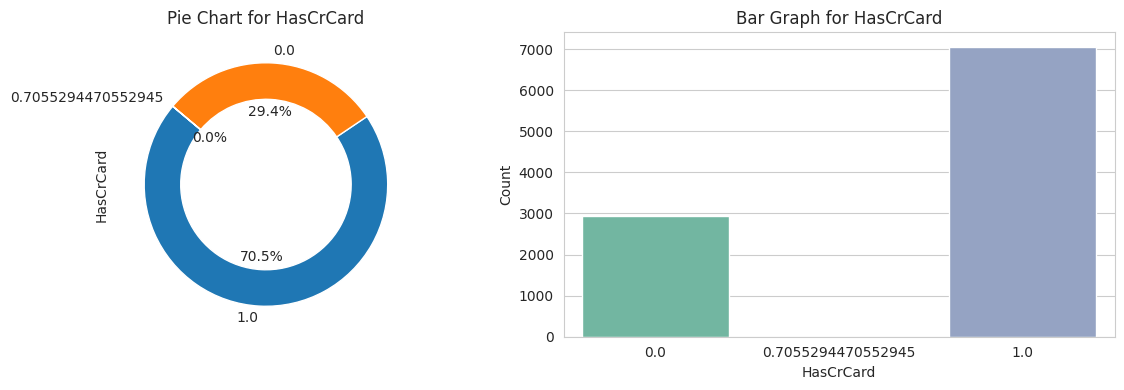

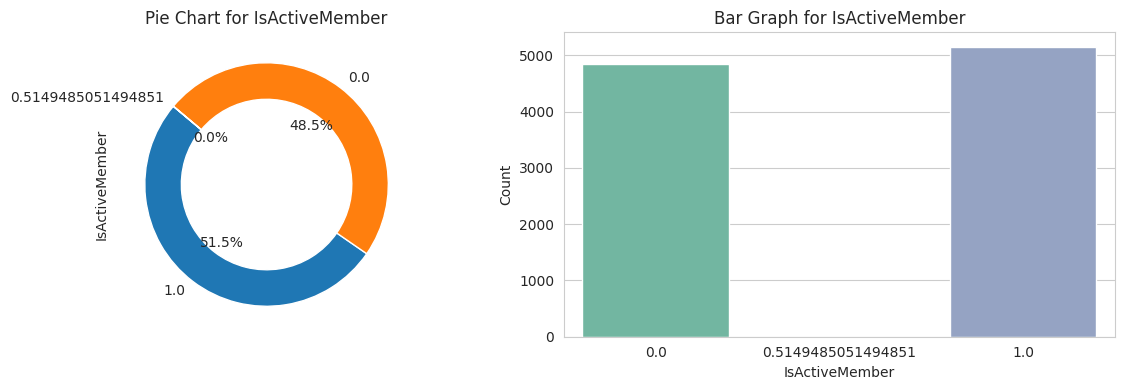

In [12]:
# Function to create and display a row of plots for a single categorical variable
def create_categorical_plots(variable):
    sns.set_style('whitegrid')

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Pie Chart
    plt.subplot(1, 2, 1)
    df[variable].value_counts().plot.pie(autopct='%1.1f%%', wedgeprops=dict(width=0.3), startangle=140)
    plt.title(f"Pie Chart for {variable}")

    # Bar Graph
    plt.subplot(1, 2, 2)
    sns.countplot(data=df, x=variable, palette=sns.color_palette("Set2"))
    plt.xlabel(variable)
    plt.ylabel("Count")
    plt.title(f"Bar Graph for {variable}")

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

# Perform univariate analysis for each categorical variable
for variable in categorical_variables:
    create_categorical_plots(variable)

## Utilizing Categorical Analysis Insights for Model Improvement

From the categorical analysis, several key conclusions can be drawn, providing valuable insights that can enhance the predictive model:

## 1. Distribution of NumOfProducts

- **Observation:**
  - The majority of customers have either 1 or 2 bank products, with a lower representation for 3 and 4 products.

- **Utilization:**
  - This insight can guide feature engineering or model adjustments to place emphasis on the behaviors and characteristics associated with customers having 1 or 2 products, potentially refining the model's ability to predict churn for this predominant segment.

## 2. Credit Card Ownership

- **Observation:**
  - The number of customers with a credit card is nearly double the count of those without a credit card.

- **Utilization:**
  - Considering the significant difference, the model could benefit from giving more weight to the features or behaviors associated with customers who possess credit cards. It may be relevant to investigate whether credit card ownership correlates with customer retention.

## 3. Other Attribute Uniformity

- **Observation:**
  - For other categorical attributes, the data is relatively consistent across specific categories.

- **Utilization:**
  - While these attributes may not exhibit significant variations, their inclusion in the model remains important for a comprehensive understanding. Ensuring that the model is trained on a balanced representation of these attributes is essential for capturing nuances and patterns.

## Overall Implications

Integrating these insights into the model-building process can contribute to better model performance by aligning the focus on predominant customer segments and relevant features. Further exploration and feature engineering specific to these observed patterns can enhance the model's predictive accuracy and provide a more nuanced understanding of customer churn factors.


### 3.3 Target Feature

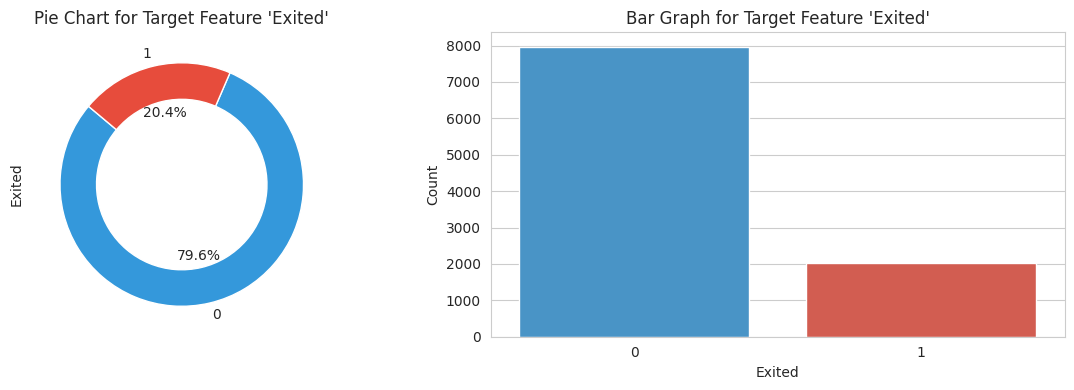

In [13]:
# Define a custom color palette for the target feature
target_palette = ['#3498db', '#e74c3c']

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Pie Chart
plt.subplot(1, 2, 1)
df[target_variable].value_counts().plot.pie(autopct='%1.1f%%', colors=target_palette, wedgeprops=dict(width=0.3), startangle=140)
plt.title(f"Pie Chart for Target Feature '{target_variable}'")

# Bar Graph
plt.subplot(1, 2, 2)
sns.countplot(data=df, x=target_variable, palette=target_palette)
plt.xlabel(target_variable)
plt.ylabel("Count")
plt.title(f"Bar Graph for Target Feature '{target_variable}'")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

## Analysis of Target Variable Distribution

### Observation

- The distribution of the target variable "Exited" reveals an imbalance, with approximately 20% of the data having "Exited" equal to 1, indicating customer churn, and the remaining 80% having "Exited" equal to 0, representing customers who have not churned.

### Implications

1. **Class Imbalance:**
   - The imbalance in the target variable classes suggests that the dataset is skewed towards non-churn instances. This can impact the model's ability to effectively learn patterns associated with customer churn.

2. **Model Sensitivity:**
   - The model may be more sensitive to the majority class, potentially leading to a bias in predictions. It may become proficient at predicting non-churn instances but may struggle to accurately identify instances of churn.

3. **Evaluation Metrics:**
   - When assessing model performance, it's crucial to consider appropriate evaluation metrics. Accuracy alone may not provide an accurate reflection of the model's effectiveness. Metrics such as precision, recall, and the area under the ROC curve (AUC-ROC) should be considered for a more comprehensive evaluation.

4. **Resampling Techniques:**
   - To address class imbalance, resampling techniques such as oversampling the minority class or undersampling the majority class can be explored. This helps ensure that the model receives sufficient exposure to both classes during training.

5. **Model Calibration:**
   - Calibrating the model to adjust for class imbalance is essential. Techniques like adjusting class weights or using ensemble methods can help mitigate the impact of the skewed distribution.

### Conclusion

Understanding and addressing the class imbalance is critical for developing a robust and accurate model for predicting customer churn. By taking appropriate steps to handle the imbalance, the model can achieve better generalization and predictive performance.


### 3.4 Bivariate Analysis

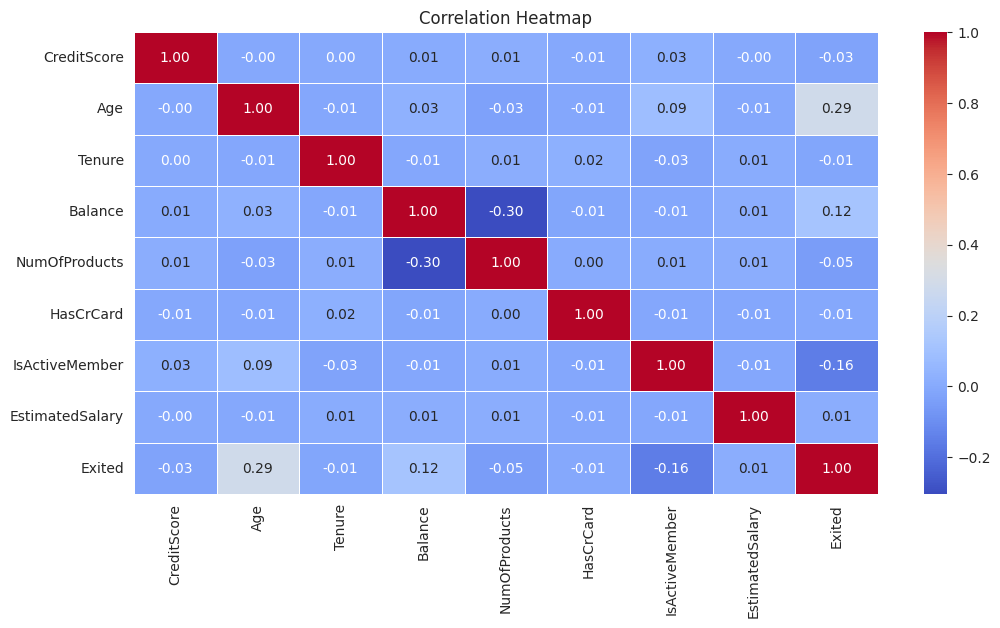

In [14]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a heatmap with the given correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Set the title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

## 4. Data Preprocessing

### 4.1 Feature Engineering

## Feature Engineering Rationale

The feature engineering process aims to enhance the model's predictive capabilities by deriving new features or transforming existing ones. Here's the rationale behind each feature creation:

### 1. Age Group

- **Bins:**
  - Age is grouped into bins (0-30, 30-40, 40-50, 50-60, 60-100).
  
- **Reasoning:**
  - Allows the model to capture different behaviors or trends associated with specific age groups.

### 2. Balance Category

- **Bins:**
  - Balance is categorized into bins based on predefined thresholds.

- **Reasoning:**
  - Enables the model to distinguish between customers with varying account balances.

### 3. Credit Score Category

- **Bins:**
  - Credit scores are grouped into bins (0-600, 600-700, 700-800, 800-900, 900+).

- **Reasoning:**
  - Facilitates capturing patterns related to different credit score ranges.

### 4. Tenure Group

- **Bins:**
  - Tenure is grouped into bins (0-5, 5-10, 10+).

- **Reasoning:**
  - Enhances understanding of customer tenure's impact on churn prediction.

### 5. Salary to Balance Ratio

- **Calculation:**
  - Ratio of estimated salary to account balance.

- **Reasoning:**
  - Reflects the financial health of customers relative to their salary and balance.

### 6. Credit Card and Active Member Interaction

- **Calculation:**
  - Interaction term combining binary features 'HasCrCard' and 'IsActiveMember'.

- **Reasoning:**
  - Considers the joint influence of having a credit card and being an active member.

### 7. ABP Interaction

- **Calculation:**
  - Interaction term involving age, balance, and the inverse of 'NumOfProducts'.

- **Reasoning:**
  - Captures a complex relationship between age, balance, and the number of bank products used.

### 8. Geo_Gender

- **Combination:**
  - Concatenation of 'Geography' and 'Gender'.

- **Reasoning:**
  - Creates a categorical feature representing combined geographical and gender information.

### 9. Total Product Usage

- **Calculation:**
  - Product usage calculated as the product of 'Tenure' and 'NumOfProducts'.

- **Reasoning:**
  - Indicates the overall usage of bank products by customers over their tenure.

### 10. Age-Adjusted Product Usage

- **Calculation:**
  - Ratio of 'NumOfProducts' to the product of ('Tenure' + 1) and 'Age'.

- **Reasoning:**
  - Normalizes product usage by considering the impact of both age and tenure.

### 11. Customer Status

- **Classification:**
  - Assigns customers to categories 'New' or 'Long-term' based on their tenure.

- **Reasoning:**
  - Considers the tenure of customers as an indicator of their relationship status with the bank.

These engineered features are designed to capture hidden patterns and relationships within the data, providing the model with more informative input for predicting customer churn.


In [15]:
def perform_feature_engineering(df):
    # Age Group
    age_bins = [0, 30, 40, 50, 60, 100]  # Adjusted age bins
    df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=False, right=False)

    # Balance Category
    balance_bins = [-np.inf, 0, 10000, 50000, 100000, np.inf]
    df['BalanceCategory'] = pd.cut(df['Balance'], bins=balance_bins, labels=False, right=False)

    # Credit Score Category
    credit_bins = [0, 600, 700, 800, 900, np.inf]  # Adjusted credit bins
    df['CreditScoreCategory'] = pd.cut(df['CreditScore'], bins=credit_bins, labels=False, right=False)

    # Tenure Group
    tenure_bins = [0, 5, 10, np.inf]  # Adjusted tenure bins
    df['TenureGroup'] = pd.cut(df['Tenure'], bins=tenure_bins, labels=False, right=False)

    # Salary to Balance Ratio
    df['SalaryToBalanceRatio'] = df['EstimatedSalary'] / (df['Balance'] + 1)  # Adding 1 to avoid division by zero

    # Credit Card and Active Member Interaction
    df['CreditCard_ActiveMember'] = df['HasCrCard'] * df['IsActiveMember']

    # ABP Interaction
    df['ABPInteraction'] = df['Age'] * df['Balance'] / (df['NumOfProducts'] + 1)  # Adding 1 to avoid division by zero

    df['Geo_Gender'] = df['Geography'] + '_' + df['Gender']

    df['TotalProductUsage'] = df['Tenure'] * df['NumOfProducts']

    df['AgeAdjustedProductUsage'] = df['NumOfProducts'] / ((df['Tenure'] + 1) * df['Age'])  # Adding 1 to avoid division by zero

    df['Customer_Status'] = df['Tenure'].apply(lambda x: 'New' if x < 2 else 'Long-term')

    return df


# Apply the function to the dataset
df = perform_feature_engineering(df)


In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,BalanceCategory,CreditScoreCategory,TenureGroup,SalaryToBalanceRatio,CreditCard_ActiveMember,ABPInteraction,Geo_Gender,TotalProductUsage,AgeAdjustedProductUsage,Customer_Status
0,619,France,Female,42.0,2,0.00,1,1.000000,1.0,101348.88,...,1,1,0,101348.880000,1.000000,0.00,France_Female,2,0.007937,Long-term
1,608,Spain,Female,41.0,1,83807.86,1,0.000000,1.0,112542.58,...,3,1,0,1.342848,0.000000,1718061.13,Spain_Female,1,0.012195,New
2,502,France,Female,42.0,8,159660.80,3,1.000000,0.0,113931.57,...,4,0,1,0.713581,0.000000,1676438.40,France_Female,24,0.007937,Long-term
3,699,France,Female,39.0,1,0.00,2,0.000000,0.0,93826.63,...,1,1,0,93826.630000,0.000000,0.00,France_Female,2,0.025641,New
4,850,Spain,Female,43.0,2,125510.82,1,0.705529,1.0,79084.10,...,4,3,0,0.630093,0.705529,2698482.63,Spain_Female,2,0.007752,Long-term


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CreditScore              10002 non-null  int64  
 1   Geography                10002 non-null  object 
 2   Gender                   10002 non-null  object 
 3   Age                      10002 non-null  float64
 4   Tenure                   10002 non-null  int64  
 5   Balance                  10002 non-null  float64
 6   NumOfProducts            10002 non-null  int64  
 7   HasCrCard                10002 non-null  float64
 8   IsActiveMember           10002 non-null  float64
 9   EstimatedSalary          10002 non-null  float64
 10  Exited                   10002 non-null  int64  
 11  AgeGroup                 10002 non-null  int64  
 12  BalanceCategory          10002 non-null  int64  
 13  CreditScoreCategory      10002 non-null  int64  
 14  TenureGroup           

### 4.2 Outlier Detection

## Outlier Removal using IQR Method

### Methodology

- **IQR (Interquartile Range):**
  - Outliers are identified using the IQR method, which involves determining the range within which the majority (middle 80%) of the data resides.
  
- **Steps:**
  1. Calculate the first quartile (Q1) and third quartile (Q3) for the specified columns.
  2. Compute the IQR by subtracting Q1 from Q3.
  3. Define lower and upper bounds by subtracting 1.5 times the IQR from Q1 and adding 1.5 times the IQR to Q3, respectively.
  4. Filter the data, retaining only rows within the determined bounds.
  5. Calculate the number of rows deleted during the outlier removal process.



- **Results:**
  - Rows deleted for each numerical column if it is a outlier

### Conclusion

- The IQR-based outlier removal method helps ensure the dataset's robustness by less affecting the impact of extreme values. This preprocessing step contributes to creating a more representative and stable dataset for subsequent modeling.


In [18]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.1)
    Q3 = data[column].quantile(0.9)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the data
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    # Calculate the number of rows deleted
    rows_deleted = len(data) - len(filtered_data)

    return filtered_data, rows_deleted

def remove_outliers_iqr_for_columns(data, columns_to_check):
    rows_deleted_total = 0

    for column in columns_to_check:
        data, rows_deleted = remove_outliers_iqr(data, column)
        rows_deleted_total += rows_deleted
        print(f"Rows deleted for {column}: {rows_deleted}")

    print(f"Total rows deleted: {rows_deleted_total}")

    return data


# Specify the numerical columns to check for outliers
numerical_columns_to_check = numerical_variables #df.select_dtypes(include=['int64', 'float64']).columns

# Apply the outlier removal function
df_cleaned = remove_outliers_iqr_for_columns(df, numerical_columns_to_check)


Rows deleted for CreditScore: 0
Rows deleted for Age: 0
Rows deleted for Balance: 0
Rows deleted for EstimatedSalary: 0
Total rows deleted: 0


### 4.3 Transformation of Distributions

### Skewness Transformation with Log1p

**Objective**

- Address skewness in numerical features using the log1p transformation.

**Features to be Transformed**

- Features with skewness > 0.75 are identified for transformation.

**Transformation Process**

- Log1p transformation is applied to the identified skewed features.

**Conclusion**

- This preprocessing step enhances the normality of skewed features, contributing to improved model performance and interpretability.


In [19]:
# Get the index of the data to be transformed
skewed_features = df[numerical_variables].skew()[df[numerical_variables].skew() > 0.75].index.values

# Print the list of variables to be transformed
print("Features to be transformed (skewness > 0.75):")
print(skewed_features)

# Apply log1p transformation to skewed features
df[skewed_features] = np.log1p(df[skewed_features])

Features to be transformed (skewness > 0.75):
['Age']


In [20]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,BalanceCategory,CreditScoreCategory,TenureGroup,SalaryToBalanceRatio,CreditCard_ActiveMember,ABPInteraction,Geo_Gender,TotalProductUsage,AgeAdjustedProductUsage,Customer_Status
0,619,France,Female,3.761200,2,0.00,1,1.000000,1.0,101348.88,...,1,1,0,101348.880000,1.000000,0.00,France_Female,2,0.007937,Long-term
1,608,Spain,Female,3.737670,1,83807.86,1,0.000000,1.0,112542.58,...,3,1,0,1.342848,0.000000,1718061.13,Spain_Female,1,0.012195,New
2,502,France,Female,3.761200,8,159660.80,3,1.000000,0.0,113931.57,...,4,0,1,0.713581,0.000000,1676438.40,France_Female,24,0.007937,Long-term
3,699,France,Female,3.688879,1,0.00,2,0.000000,0.0,93826.63,...,1,1,0,93826.630000,0.000000,0.00,France_Female,2,0.025641,New
4,850,Spain,Female,3.784190,2,125510.82,1,0.705529,1.0,79084.10,...,4,3,0,0.630093,0.705529,2698482.63,Spain_Female,2,0.007752,Long-term


### 4.4 Feature Encoding

### Feature Encoding: One-Hot Encoding

### Methodology

- **Objective:**
  - Perform one-hot encoding on categorical features to convert them into a suitable format for machine learning models.

### Columns Selected for Encoding

- The following columns are selected for one-hot encoding:
  - 'Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Geo_Gender', 'Customer_Status'

### Data Preparation

- Two subsets of the dataset are created:
  1. **df_to_encode:**
     - Contains columns selected for one-hot encoding.
  2. **df_to_scale:**
     - Excludes columns selected for encoding to facilitate scaling.

### One-Hot Encoding Process

- **Implementation:**
  - The `get_dummies` function from pandas is utilized to perform one-hot encoding on the specified columns.
  - The parameter `drop_first=True` is set to create binary encoded columns.

## Conclusion

- One-hot encoding transforms categorical features into a format suitable for machine learning models, enabling the incorporation of categorical information in the analysis.


In [21]:

# Selecting specific columns for encoding
columns_to_encode = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Geo_Gender', 'Customer_Status']
df_to_encode = df[columns_to_encode]

# Dropping selected columns for scaling
df_to_scale = df.drop(columns_to_encode, axis=1)

# Use pandas get_dummies to one-hot encode specified columns in the dataset
df_encoded = pd.get_dummies(df_to_encode, columns=['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Geo_Gender', 'Customer_Status'], drop_first=True)


In [22]:
# Display the first few rows of the encoded DataFrame
# (df_encoded.head())

In [23]:
df_to_scale.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited,AgeGroup,BalanceCategory,CreditScoreCategory,TenureGroup,SalaryToBalanceRatio,CreditCard_ActiveMember,ABPInteraction,TotalProductUsage,AgeAdjustedProductUsage
0,619,3.761200,2,0.00,101348.88,1,2,1,1,0,101348.880000,1.000000,0.00,2,0.007937
1,608,3.737670,1,83807.86,112542.58,0,2,3,1,0,1.342848,0.000000,1718061.13,1,0.012195
2,502,3.761200,8,159660.80,113931.57,1,2,4,0,1,0.713581,0.000000,1676438.40,24,0.007937
3,699,3.688879,1,0.00,93826.63,0,1,1,1,0,93826.630000,0.000000,0.00,2,0.025641
4,850,3.784190,2,125510.82,79084.10,0,2,4,3,0,0.630093,0.705529,2698482.63,2,0.007752


### 4.5 Feature Scaling

### Feature Scaling: Min-Max Scaling

In order to ensure consistent scales across numerical features, we apply Min-Max scaling using the MinMaxScaler from scikit-learn. This normalization technique prevents any particular feature from dominating the modeling process due to its scale, contributing to a more balanced and effective performance of machine learning models. The scaled numerical features are then concatenated with the one-hot encoded categorical features, resulting in the final preprocessed dataset.


In [24]:
from sklearn.preprocessing import MinMaxScaler


# Initialize MinMaxScaler
minmax_scaler = MinMaxScaler()

# Fit the scaler on the training data
minmax_scaler.fit(df_to_scale.drop(['Exited'], axis=1))

# Scale the training data
scaled_data_train = minmax_scaler.transform(df_to_scale.drop(['Exited'], axis=1))
scaled_train_df = pd.DataFrame(scaled_data_train, columns=df_to_scale.drop(['Exited'], axis=1).columns)

# Concatenate datasets
df_combined = pd.concat([df_encoded.reset_index(drop=True), scaled_train_df.reset_index(drop=True)], axis=1)



In [25]:
# Display the first few rows of the combined DataFrame
(df_combined.head())

,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0.7055294470552945,HasCrCard_1.0,IsActiveMember_0.5149485051494851,IsActiveMember_1.0,...,EstimatedSalary,AgeGroup,BalanceCategory,CreditScoreCategory,TenureGroup,SalaryToBalanceRatio,CreditCard_ActiveMember,ABPInteraction,TotalProductUsage,AgeAdjustedProductUsage
0,0,0,0,0,0,0,0,1,0,1,...,0.506735,0.50,0.000000,0.333333,0.0,0.506763,1.000000,0.000000,0.050,0.068648
1,0,1,0,0,0,0,0,0,0,1,...,0.562709,0.50,0.666667,0.333333,0.0,0.000007,0.000000,0.252877,0.025,0.111729
2,0,0,0,0,1,0,0,1,0,0,...,0.569654,0.50,1.000000,0.000000,0.5,0.000004,0.000000,0.246751,0.600,0.068648
3,0,0,0,1,0,0,0,0,0,0,...,0.469120,0.25,0.000000,0.333333,0.0,0.469151,0.000000,0.000000,0.050,0.247754
4,0,1,0,0,0,0,1,0,0,1,...,0.395400,0.50,1.000000,1.000000,0.0,0.000003,0.705529,0.397183,0.050,0.066780


### 4.6 Correlation Matrix

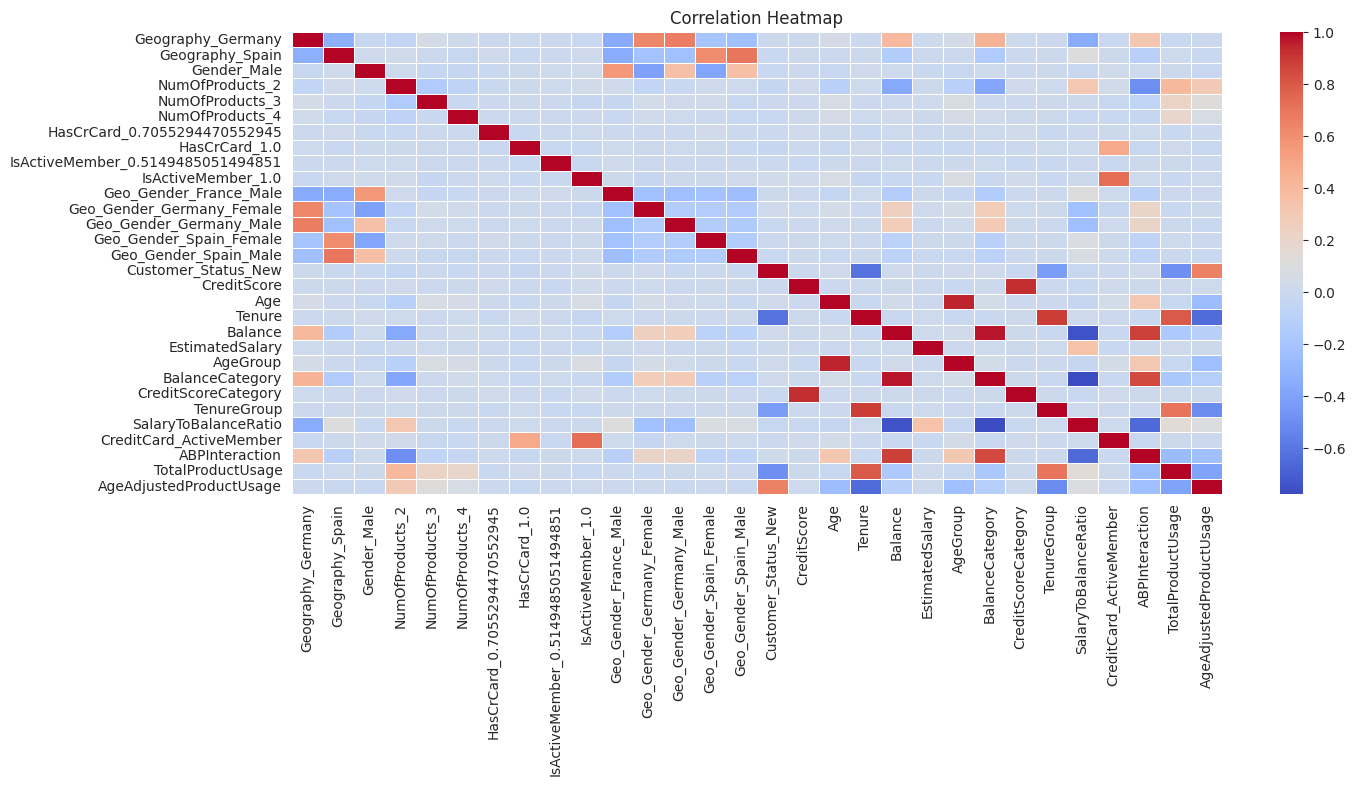

In [26]:
# Compute the correlation matrix
corr_matrix = df_combined.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 6))

# Create a heatmap with the given correlation matrix
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Set the title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

In [27]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Geography_Germany                  10002 non-null  uint8  
 1   Geography_Spain                    10002 non-null  uint8  
 2   Gender_Male                        10002 non-null  uint8  
 3   NumOfProducts_2                    10002 non-null  uint8  
 4   NumOfProducts_3                    10002 non-null  uint8  
 5   NumOfProducts_4                    10002 non-null  uint8  
 6   HasCrCard_0.7055294470552945       10002 non-null  uint8  
 7   HasCrCard_1.0                      10002 non-null  uint8  
 8   IsActiveMember_0.5149485051494851  10002 non-null  uint8  
 9   IsActiveMember_1.0                 10002 non-null  uint8  
 10  Geo_Gender_France_Male             10002 non-null  uint8  
 11  Geo_Gender_Germany_Female          10002 non-null  uin

In [28]:
df_combined['Exited'] = df['Exited'].values

## 5. Modelling

### 5.1 Deciding on an Evaluation Metric & Protocol

Now, let's figure out how to check if our model is getting better:

- **For Our Case:**
  - **Why?** We care about catching both the leaving customers and getting the predictions right overall.
  - **Success Metric:** ROC AUC (it combines accuracy and recall in a simple way)
  - **How to Check:** K-Fold Cross-Validation (it helps when we don't have tons of data, making sure our model works well on different parts of our data).

This way, we're making sure our model is good at catching the important stuff without having too much data.

### 5.2 Developing a model that is better than baseline Model


## Goal
 The evaluation is done using k-fold cross-validation approach, training the model on various subsets of the data and testing it on unseen subsets. This ensures a proper estimate of the model's ability to generalize.

## Key Steps

### Data Preparation

- **X:** Contains all features except the target variable (Exited).

- **y:** Contains the target variable (Exited), indicating whether a customer churned (1) or not (0).

### Stratified K-Fold Cross-Validation Setup

- `StratifiedKFold:` Divides the data into 5 folds while maintaining the same class distribution in each fold.

- `kf.split:` Generates training and validation indices for each fold, ensuring balanced representation of churned and non-churned customers.

### Evaluation Metric

- `roc_auc_score:` Area Under the Receiver Operating Characteristic (ROC) Curve, measuring the model's ability to distinguish between churned and non-churned customers.

### Model Building and Training

- **Sequential Model:**
  - Simple neural network architecture with two layers.
    - Dense Layer (64 neurons, ReLU activation): Extracts features from the input data.
    - Output Layer (1 neuron, Sigmoid activation): Predicts the probability of churn (0-1).

- **Compilation:**
  - Configures the model with an optimizer (RMSprop), loss function (binary cross-entropy), and evaluation metric (AUC).

- **Training:**
  - Trains the model on each fold's training set for 10 epochs with batches of 32 samples.

### Evaluation on Validation Set

- **Prediction:**
  - Generates predictions (probabilities) for the validation set.

- **ROC AUC Score:**
  - Calculates the AUC score for each fold, indicating how well the model separates the classes.

### Overall Performance

- **Mean AUC ROC Score:**
  - Calculates the average AUC score across all folds, providing a reliable estimate of the model's performance.


In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.regularizers import l2

X = df_combined.drop('Exited', axis=1)
y = df_combined['Exited']

mean_list = []

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a list to store AUC ROC scores for each fold
auc_roc_scores = []

# Loop through each fold
for fold, (train_index, val_index) in enumerate(kf.split(X, y), 1):
    print(f"Training on Fold {fold}")

    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Build  model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=RMSprop(),
                  loss='binary_crossentropy',
                  metrics=['AUC'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Predict on the validation set
    y_pred = model.predict(X_val)

    # Evaluate using roc_auc_score
    auc_roc = roc_auc_score(y_val, y_pred)
    auc_roc_scores.append(auc_roc)
    print(f'AUC ROC Score for Fold {fold}: {auc_roc}\n')

# Display the mean AUC ROC score across all folds
mean_auc_roc = np.mean(auc_roc_scores)
mean_list.append(mean_auc_roc)
print(f'Mean AUC ROC Score across all folds: {mean_auc_roc}')


Training on Fold 1
63/63 [==============================] - 0s 1ms/step
AUC ROC Score for Fold 1: 0.8428926184409734

Training on Fold 2
63/63 [==============================] - 0s 2ms/step
AUC ROC Score for Fold 2: 0.840621653557845

Training on Fold 3
63/63 [==============================] - 0s 1ms/step
AUC ROC Score for Fold 3: 0.8413590624692088

Training on Fold 4
63/63 [==============================] - 0s 2ms/step
AUC ROC Score for Fold 4: 0.854378261157922

Training on Fold 5
63/63 [==============================] - 0s 1ms/step
AUC ROC Score for Fold 5: 0.8559237203305

Mean AUC ROC Score across all folds: 0.8470350631912898


### 5.3 Scaling up: developing a model that overfits

## Goal

Same as before: Evaluate a model's ability to predict customer churn using cross-validation. However, this iteration introduces key enhancements in model complexity and training cycles.

## Key Differences

### Larger, More Complex Model:

The model architecture is expanded to include four layers, providing a deeper and more complex structure:
   - Dense(128) -> Dense(64) -> Dense(32) -> Dense(1)
   - This augmentation increases the model's capacity to learn more complex patterns, but it also introduces the risk of overfitting.

### More Training Cycles:

The number of training epochs is extended from 10 to 20, allowing the model to learn for a more duration.
   - This decision provides the model with additional exposure to the data, potentially capturing subtler patterns and improving overall performance.

These modifications are aimed at pushing the model's boundaries, exploring its capability to handle more complicated relationships within the data.

In [30]:
# Initialize a list to store AUC ROC scores for each fold
auc_roc_scores = []

# Loop through each fold
for fold, (train_index, val_index) in enumerate(kf.split(X, y), 1):
    print(f"Training on Fold {fold}")

    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Build a larger model with more layers and units
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=RMSprop(),
                  loss='binary_crossentropy',
                  metrics=['AUC'])

    # Train the model for more epochs
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

    # Predict on the validation set
    y_pred = model.predict(X_val)

    # Evaluate using roc_auc_score
    auc_roc = roc_auc_score(y_val, y_pred)
    auc_roc_scores.append(auc_roc)
    print(f'AUC ROC Score for Fold {fold}: {auc_roc}\n')

# Display the mean AUC ROC score across all folds
mean_auc_roc = np.mean(auc_roc_scores)
mean_list.append(mean_auc_roc)
print(f'Mean AUC ROC Score across all folds: {mean_auc_roc}')


Training on Fold 1
63/63 [==============================] - 0s 1ms/step
AUC ROC Score for Fold 1: 0.8448666346639095

Training on Fold 2
63/63 [==============================] - 0s 1ms/step
AUC ROC Score for Fold 2: 0.8447404699481802

Training on Fold 3
63/63 [==============================] - 0s 2ms/step
AUC ROC Score for Fold 3: 0.8470138683614149

Training on Fold 4
63/63 [==============================] - 0s 1ms/step
AUC ROC Score for Fold 4: 0.8576635186804679

Training on Fold 5
63/63 [==============================] - 0s 1ms/step
AUC ROC Score for Fold 5: 0.8503279859212063

Mean AUC ROC Score across all folds: 0.8489224955150357


### 5.4 Regularizing our model and tuning hyperparameters


## Goal

The objective is to train a robust model for predicting customer churn, addressing concerns related to overfitting and ensuring reliable performance.

## Key Steps


### Model Architecture

Build a neural network with the following structure:
- Four hidden layers (128, 64, 32, 1 neurons).
- Apply L2 regularization (0.001) to all layers to penalize large weights and reduce overfitting.

### Dropout Integration

To prevent overreliance on specific features:
- Introduce Dropout layers with rates of 0.5, 0.3, 0.2 to randomly ignore neurons during training.

### Compilation

Configure the model with:
- RMSprop optimizer.
- Binary cross-entropy loss.
- AUC metric for evaluation.

### Training

Train the model:
- For up to 50 epochs.
- Implement early stopping to halt training when validation performance plateaus or declines, preventing excessive learning.

### Evaluation

Assess the model's performance:
- Calculate the AUC ROC score for each fold.
- Determine the overall mean score for a comprehensive assessment.

These steps collectively contribute to the development of a robust model for predicting customer churn.


In [32]:
from tensorflow.keras.layers import Dropout

X = df_combined.drop('Exited', axis=1)
y = df_combined['Exited']

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a list to store AUC ROC scores for each fold
auc_roc_scores = []

# Loop through each fold
for fold, (train_index, val_index) in enumerate(kf.split(X_standardized, y), 1):
    print(f"Training on Fold {fold}")

    X_train, X_val = X_standardized[train_index], X_standardized[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Build a model with dropout for regularization and L2 regularization
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001)))

    # Compile the model
    model.compile(optimizer=RMSprop(),
                  loss='binary_crossentropy',
                  metrics=['AUC'])

    # Train the model with early stopping
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)

    # Predict on the validation set
    y_pred = model.predict(X_val)

    # Evaluate using roc_auc_score
    auc_roc = roc_auc_score(y_val, y_pred)
    auc_roc_scores.append(auc_roc)
    print(f'AUC ROC Score for Fold {fold}: {auc_roc}\n')

# Display the mean AUC ROC score across all folds
mean_auc_roc = np.mean(auc_roc_scores)
mean_list.append(mean_auc_roc)
print(f'Mean AUC ROC Score across all folds: {mean_auc_roc}')


Training on Fold 1
63/63 [==============================] - 0s 1ms/step
AUC ROC Score for Fold 1: 0.8523918983789374

Training on Fold 2
63/63 [==============================] - 0s 2ms/step
AUC ROC Score for Fold 2: 0.8476514899745209

Training on Fold 3
63/63 [==============================] - 0s 1ms/step
AUC ROC Score for Fold 3: 0.8567916174007291

Training on Fold 4
63/63 [==============================] - 0s 2ms/step
AUC ROC Score for Fold 4: 0.861929726336506

Training on Fold 5
63/63 [==============================] - 0s 1ms/step
AUC ROC Score for Fold 5: 0.8550060075483804

Mean AUC ROC Score across all folds: 0.8547541479278147


### 5.5 Results Comparisons

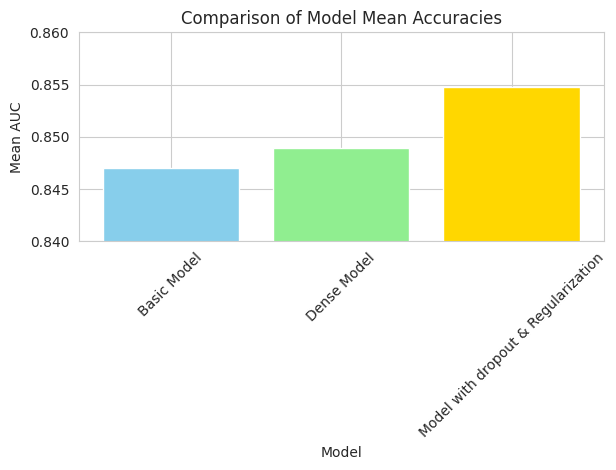

In [33]:
# mean_list = [0.8472400702243105, 0.84810664995895, 0.854386470628255]
model = ['Basic Model', 'Dense Model', 'Model with dropout & Regularization']


# Create the bar chart
plt.bar(model, mean_list, color=['skyblue', 'lightgreen', 'gold'])

# Add labels and title
plt.xlabel("Model")
plt.ylabel("Mean AUC")
plt.title("Comparison of Model Mean Accuracies")

# Set y-axis range
plt.ylim(0.84, 0.86)  # Set the lower and upper limits

# Show the chart
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


### 5.6 Effect of dropout on validation loss

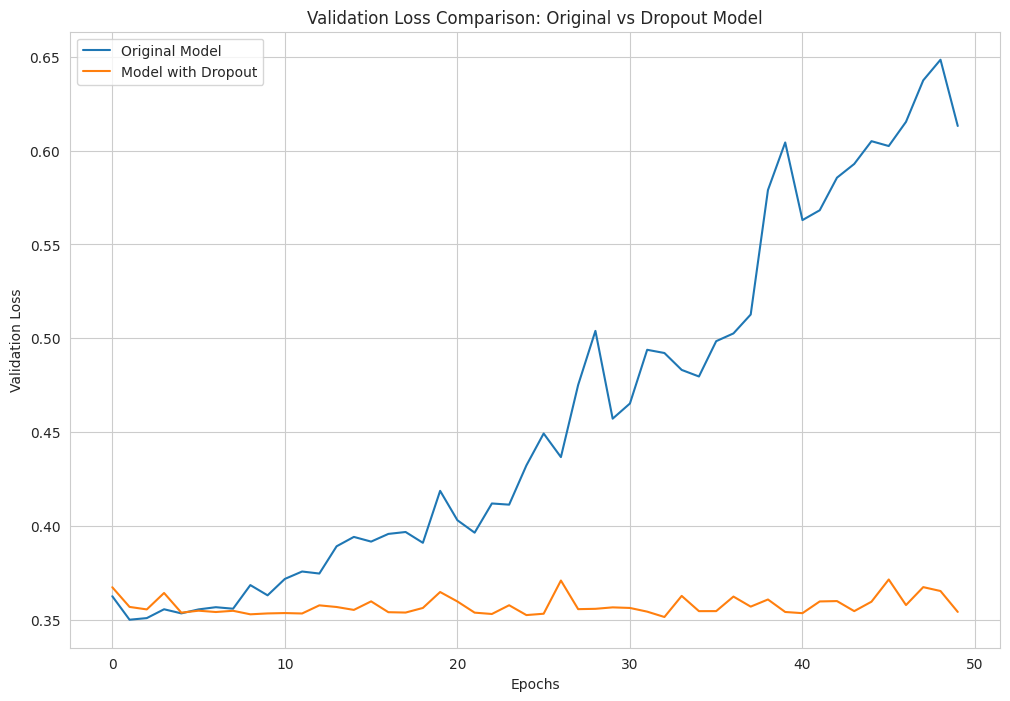

In [34]:
# Build the original model without dropout
model_no_dropout = Sequential()
model_no_dropout.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model_no_dropout.add(Dense(64, activation='relu'))
model_no_dropout.add(Dense(32, activation='relu'))
model_no_dropout.add(Dense(1, activation='sigmoid'))
model_no_dropout.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['AUC'])

# Build the model with dropout
model_with_dropout = Sequential()
model_with_dropout.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model_with_dropout.add(Dropout(0.5))
model_with_dropout.add(Dense(64, activation='relu'))
model_with_dropout.add(Dropout(0.3))
model_with_dropout.add(Dense(32, activation='relu'))
model_with_dropout.add(Dropout(0.2))
model_with_dropout.add(Dense(1, activation='sigmoid'))
model_with_dropout.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['AUC'])

# Train both models
history_no_dropout = model_no_dropout.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)
history_with_dropout = model_with_dropout.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)

# Plot the validation loss for both models
plt.figure(figsize=(12, 8))
plt.plot(history_no_dropout.history['val_loss'], label='Original Model')
plt.plot(history_with_dropout.history['val_loss'], label='Model with Dropout')
plt.title('Validation Loss Comparison: Original vs Dropout Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()


### 5.7 Effect of L2 weight regularization on validation loss

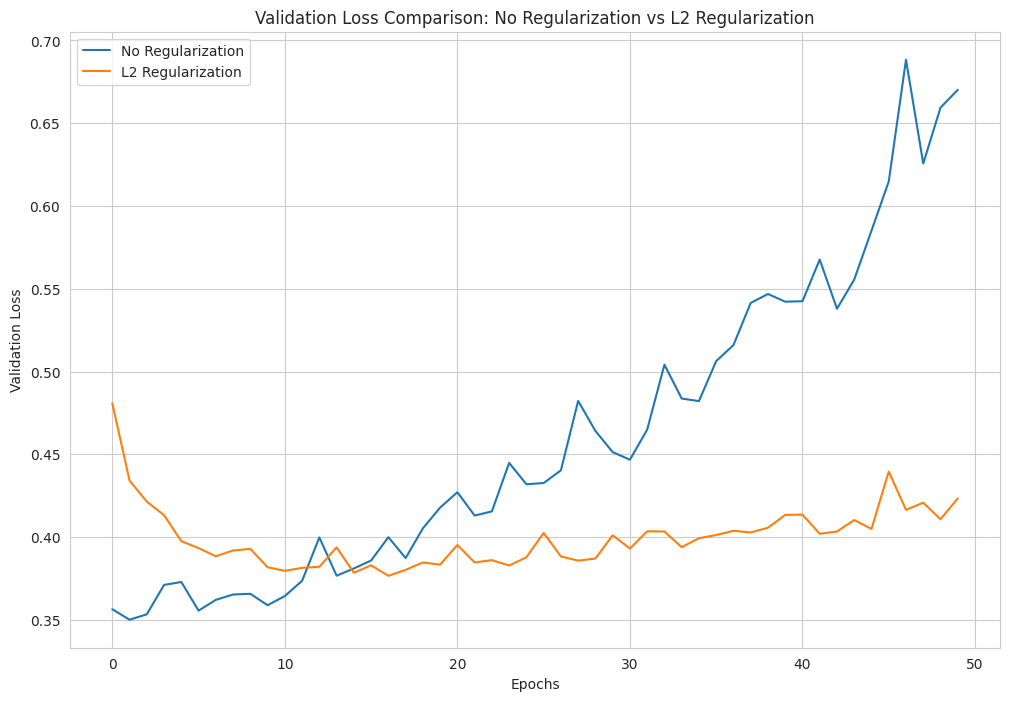

In [35]:
from tensorflow.keras.regularizers import l2

# Function to build the model with L2 regularization
def build_model_with_l2(regularization_rate):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(regularization_rate)))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(regularization_rate)))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(regularization_rate)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Build the original model without regularization
model_no_regularization = Sequential()
model_no_regularization.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model_no_regularization.add(Dense(64, activation='relu'))
model_no_regularization.add(Dense(32, activation='relu'))
model_no_regularization.add(Dense(1, activation='sigmoid'))
model_no_regularization.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

# Build the model with L2 regularization
model_with_l2 = build_model_with_l2(0.001)

# Train both models
history_no_regularization = model_no_regularization.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)
history_with_l2 = model_with_l2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)

# Plot the validation loss for both models
plt.figure(figsize=(12, 8))
plt.plot(history_no_regularization.history['val_loss'], label='No Regularization')
plt.plot(history_with_l2.history['val_loss'], label='L2 Regularization')
plt.title('Validation Loss Comparison: No Regularization vs L2 Regularization')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()
